# <font color='red'>Classification on MNIST (part 1: no NN)</font>

The task is to teach a machine how to learn to recognize hand-written digits (MNIST).

# **Practice C1**: Set-up

In [1]:
#numpy
import numpy as np
#sklearn
import sklearn
# matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# **Practice C2**: Import the data and briefly inspect it

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame= False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

Familiarize a bit with the content of X and y.

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
28*28

784

In [8]:
X[5]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

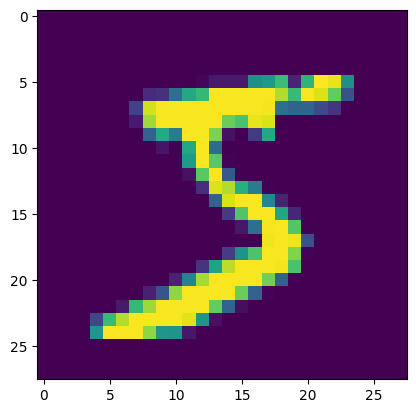

In [9]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)

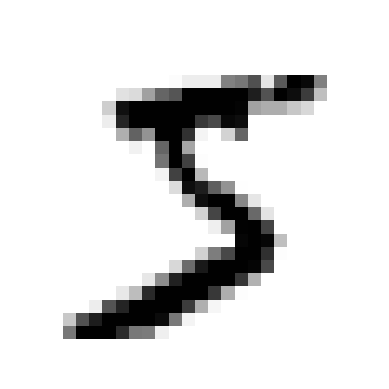

In [10]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


As expected, the label for this is:

In [11]:
y[0]

'5'

Which is a string:

In [12]:
type(y[0])

str

For sure I want to cast all these into integers:

In [13]:
y = y.astype(np.uint8)
y[0]

5

In [14]:
type(y[0])

numpy.uint8

# **Practice C3**: Train-test splitting

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
X_train.shape

(60000, 784)

In [17]:
X_test.shape

(10000, 784)

In [18]:
y_train.shape

(60000,)

In [19]:
y_test.shape

(10000,)

# **Practice C4**: Build a binary classifier: a "5-detector"

Create the label vectors (for both the train and test set):

In [20]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [21]:
y_train_5.shape

(60000,)

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
y_train_5  

array([ True, False, False, ...,  True, False, False])

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

# note: hyperparameters set to future default values in future versions on sklearn. 

SGDClassifier(random_state=42)

I know that X[0] is a 5, X[1] is a 0, X[2] is a 4:

In [25]:
print("y[0] =", y[0])
print("y[1] =", y[1])
print("y[2] =", y[2])

y[0] = 5
y[1] = 0
y[2] = 4


Let's check if the classifier we built above works for these 3 examples:

In [26]:
sgd_clf.predict([X[0]]) # X[0] is a 5

array([ True])

In [27]:
sgd_clf.predict([X[1]]) # X[1] is a 0, so NOT a 5

array([False])

In [28]:
sgd_clf.predict([X[2]]) # X[2] is a 4, so NOT a 5

array([False])

OK, it works!

So, how accurate is this model?

# **Practice C5**: Compute the accuracy

We opted for a train-test split, so most rapid is to ask for the score in this way:

In [29]:
sgd_clf.score(X_test, y_test_5)

0.9492

Actually, k-fold cross-validation would be similar or better - and would also allow you to get insight on its variance. Let's try it out.

Use `cross_val_score()` function in sklearn to evaluate your SGDClassifier model using k-fold cross-validation, with k=3, i.e. make k trainings: split the training set into k folds, train and make predictions and evaluate them on each fold using a model trained on the remaining folds.

In [30]:
y_5 = (y == 5)
y_5.shape

(70000,)

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X, y_5, cv=3, scoring="accuracy")

# this trigger the training of cv=3 models, so it might take a while to complete!

array([0.96794377, 0.94797069, 0.96194231])

*Really?! Such a high accuracy at first attempt?! Are you sure this is reliable?*

# **Practice C6**: Confusion matrix: looking for a better performance metrics

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(sgd_clf, X, y_5, cv=3)

# this trigger the training of cv=3 models, so it might take a while to complete!

In [ ]:
type(y_pred)

In [ ]:
y_pred.shape

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_5, y_pred)
cm

Try to visualize, when needed and/or useful.

In [ ]:
import pandas as pd
import seaborn as sn

df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlOrRd", fmt="d")

Other possible metrics are **precision** and **recall**, and often also the **F1** score:

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_5, y_pred)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_5, y_pred)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_5, y_pred)

In [ ]:
#create an array with, de-facto, the class probabilities
y_scores = cross_val_predict(sgd_clf, X, y_5, cv=3,
                             method="decision_function")

In [ ]:
y_scores

In [ ]:
y_5

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            
    
plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_5, y_scores)

The AUC score should result as roughly 96-97%, when comparing your work with others'. It is a good result!